In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


# Разбираем https://www.evanmiller.org/ab-testing/t-test.html

http://datalearning.ru/index.php/textbook?cid=1&mid=3&topic=1

Гипотеза о равенстве математических ожиданий при известных дисперсиях (two-sample z-test).
http://datalearning.ru/index.php/textbook?cid=1&mid=3&topic=2

https://ru.wikipedia.org/wiki/T-%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0#%D0%94%D0%B2%D1%83%D1%85%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BE%D1%87%D0%BD%D1%8B%D0%B9_t-%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%B4%D0%BB%D1%8F_%D0%B7%D0%B0%D0%B2%D0%B8%D1%81%D0%B8%D0%BC%D1%8B%D1%85_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BE%D0%BA

Пусть имеются две независимые выборки A и B нормально распределённых случайных величин. Необходимо проверить по выборочным данным нулевую гипотезу равенства математических ожиданий этих случайных величин H_0 : M_1 = M_2

In [3]:
A = np.array([64.2,28.4,85.3,83.1,13.4,56.8,44.2,90])
B = np.array([45,29.5,32.3,49.3,18.3,34.2,43.9,13.8,27.4,43.4])

Зададим уровень значимости (https://radioprog.ru/post/926) . Грубо говоря, вероятность ошибки принятия нулевой гипотезы (это называют еще ошибка первого рода)

Так как мы будем рассматривать в этом примере двухсторонную гипотезу, то нужно будет в дальнейшем заданное значение поделить на 2. (https://bstudy.net/706619/ekonomika/metod_proverki_statisticheskih_gipotez)
Альтернативная гипотеза у нас это H1: M_1!=M_2. (если бы рассматривали > или < то делить не надо было бы)

In [4]:
alpha = 0.05

Дальше нам надо посчитать значение критерия. Сделаем это двумя способами: вручную(для наглядности) и с помощью библиотеки

In [5]:
#вручную
mean_A = A.mean()
mean_B = B.mean()

size_A = A.shape[0]
size_B = B.shape[0]

S_2_A = A.var(ddof=1)
S_2_B = B.var(ddof=1)

t = (mean_A-mean_B)/np.sqrt((S_2_A/size_A+S_2_B/size_B))
print(t)

2.3102761451054765


In [6]:
#степень свободы
df = (S_2_A/size_A+S_2_B/size_B)**2 / ((S_2_A/size_A)**2/(size_A-1)+(S_2_B/size_B)**2/(size_B-1))

In [7]:
# наша посчитанная статистика t имеет распределение стьюдента со степерью совободы df 
# (степень свободы один из параметров расределения,на вики есть об этом)
pvalue = 1 - (stats.t.cdf(t,df) - stats.t.cdf(-t,df))

In [8]:
# с помощью библиотеки получаем то же
statistic,pvalue = stats.ttest_ind(A, B,alternative='two-sided',equal_var=False)
print('',statistic,pvalue)

 2.3102761451054765 0.04621393426531888


In [9]:
# итоговый результат
if pvalue/2<alpha:
    print('Гипотезу отвергаем')
else:
    print('Гипотезу принимаем')
    

Гипотезу отвергаем


In [10]:
d = abs(mean_A-mean_B)

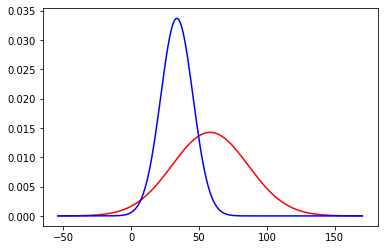

In [11]:
x = np.linspace(mean_A-np.sqrt(S_2_A)*4,mean_A+np.sqrt(S_2_A)*4,200)

pdf1 = stats.norm.pdf(x,mean_A,np.sqrt(S_2_A))
pdf2 = stats.norm.pdf(x,mean_B,np.sqrt(S_2_B))

plt.plot(x,pdf1 , color = 'red')
plt.plot(x,pdf2 , color = 'blue')